# TOBE UPDATED: NYC Taxi Trip Records using xxx algrithms

## 1) About the data

* The data set is publically available for free on NYC.gov
* I was living in NYC for some time during my internship and visited for a few times, and took taxi for sure. However, I never think about Taxi in terms of Trip Records. The research is interesting to me and I would like to introduce the result to my NYC friends next time.
* The data set is huge:
    - It has 666376 rows and 19 columns, including all of the information about Taxi

## 2) Link to the data set
* NYC Taxi Limousine trip record data URL: https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page
* To download the data set: https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2018-08.csv

In [1]:
# Enter link here.
nyc_gov_link = "https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page"
green_tripdata_download = "https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2018-08.csv"

## 3) Import the data
List the total rows and columns

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import os
from scipy import stats
import matplotlib.pyplot as plt

# The dateset is 59MB, I downloaded to my local laptop to speed up.
url = "/Users/Jingwen/Desktop/bioinfo-ML/green_tripdata_2018-08.csv"

data = pd.read_csv(url)

# Report how many rows and columns of data you have loaded.
print("There are",data.shape[0],"rows and",data.shape[1],"columns.")

There are 666376 rows and 19 columns.


## 4) Show the head of the data set

In [3]:
data.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type
0,2,2018-08-01 00:03:22,2018-08-01 00:17:59,N,1,255,49,1,3.54,13.5,0.5,0.5,2.96,0.0,NaN,0.3,17.76,1,1
1,2,2018-08-01 00:37:08,2018-08-01 00:46:53,N,1,256,112,1,1.94,8.5,0.5,0.5,1.96,0.0,NaN,0.3,11.76,1,1
2,2,2018-08-01 00:12:45,2018-08-01 00:20:21,N,1,146,7,2,1.37,7.0,0.5,0.5,0.00,0.0,NaN,0.3,8.30,2,1
3,2,2018-08-01 00:21:29,2018-08-01 00:27:41,N,1,7,260,2,1.10,6.5,0.5,0.5,0.00,0.0,NaN,0.3,7.80,2,1
4,2,2018-08-01 00:03:24,2018-08-01 00:06:44,N,1,256,256,1,0.56,4.5,0.5,0.5,1.74,0.0,NaN,0.3,7.54,1,1


## 5) Show me the shape of your data
* Size of the Data Set
* Shape of the Data Set
* Data Types of the Data Set

In [4]:
# data.size 
size = data.size 
  
# data.shape 
shape = data.shape 
  
# printing size and shape 
print("Size = {}\nShape ={}\nShape[0] x Shape[1] = {}\n". 
      format(size, shape, shape[0]*shape[1])) 

# data.dtypes
dtypes = data.dtypes
print("data types\n{}\n". 
      format(dtypes))

Size = 12661144
Shape =(666376, 19)
Shape[0] x Shape[1] = 12661144

data types
VendorID                   int64
lpep_pickup_datetime      object
lpep_dropoff_datetime     object
store_and_fwd_flag        object
RatecodeID                 int64
PULocationID               int64
DOLocationID               int64
passenger_count            int64
trip_distance            float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
ehail_fee                float64
improvement_surcharge    float64
total_amount             float64
payment_type               int64
trip_type                  int64
dtype: object



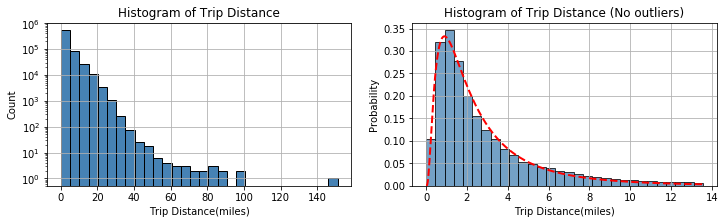

In [5]:
plt.figure(1, figsize=(12, 3))

def plotHistogram(data):
    plt.subplot(121)
    plt.hist(data.trip_distance,
             bins=30,
             log=True,
             color='steelblue',
             edgecolor='k',)
    plt.xlabel('Trip Distance(miles)')
    plt.ylabel('Count')
    plt.grid(True)
    plt.title('Histogram of Trip Distance')

plotHistogram(data)

def findStructure(data):
    plt.subplot(122)

    x = data.trip_distance 
    x_norm = x[~((x-x.median()).abs()>3*x.std())]

    plt.hist(x_norm, 
              bins=30,
              color='steelblue',
              edgecolor='k',
              #normed=True,
              density=True,
              alpha=0.75)
    plt.xlabel('Trip Distance(miles)')
    plt.ylabel('Probability')
    plt.grid(True)
    plt.title('Histogram of Trip Distance (No outliers)')
    
    # Fit a curve to the variates
    shape, loc, scale = stats.lognorm.fit(x, loc=0) 

    y = np.linspace(x_norm.min(), x_norm.max(), num=500)
    pdf = stats.lognorm.pdf(y, shape, scale=np.exp(np.log(data.trip_distance.median())))
    
    # Plot fitted curve
    plt.plot(y, pdf, 'r--', linewidth=2) 
    
    # Get axis handle for text positioning
    ax = plt.gca() 
    
findStructure(data)
plt.show()    

In [6]:
data_pie_percentage = data.groupby('passenger_count').count()['VendorID']
print(data_pie_percentage)

passenger_count
0       851
1    565196
2     52253
3     10355
4      3605
5     21911
6     12187
7        10
8         6
9         2
Name: VendorID, dtype: int64


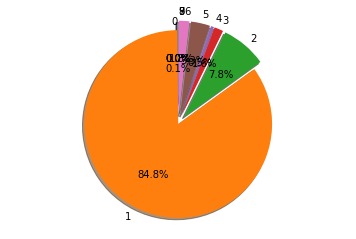

In [7]:
labels = [0,1,2,3,4,5,6,7,8,9]
sizes = data_pie_percentage
explode = (0, 0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)  
#colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#ffcc99','#ffcc99','#ffcc99','#ffcc99','#ffcc99','#ffcc99']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [8]:
data_pie_total_amount = data.groupby('passenger_count').mean()['fare_amount']

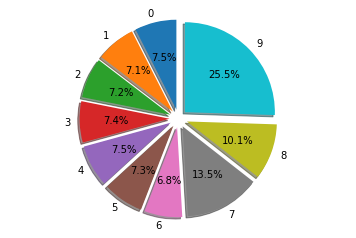

In [9]:
labels = [0,1,2,3,4,5,6,7,8,9]
sizes = data_pie_total_amount
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)  
#colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#ffcc99','#ffcc99','#ffcc99','#ffcc99','#ffcc99','#ffcc99']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [10]:
data_pie_trip_distance = data.groupby('passenger_count').mean()['trip_distance']

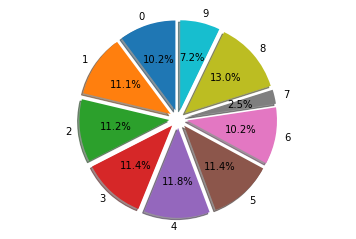

In [15]:
labels = [0,1,2,3,4,5,6,7,8,9]
sizes = data_pie_trip_distance
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## 6) Show me the proportion of missing observations for each column of your data

In [13]:
print(data_pie_percentage[0]/data_pie_percentage.sum())

0.001277056796763389


## 7) Give me a problem statement.
Below, write a problem statement. Keep in mind that your task is to tease out relationships in your data and eventually build a predictive model. Your problem statement can be vague, but you should have a goal in mind. Your problem statement should be between one sentence and one paragraph.

## 8) What is your _y_-variable?
For final project, you will need to perform a statistical model. This means you will have to accurately predict some y-variable for some combination of x-variables. From your problem statement in part 7, what is that y-variable?